In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart  = pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x = heart.drop("target" , axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y = heart["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
clf = RandomForestClassifier()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [7]:
clf.fit(x_train,y_train); ##training model

In [8]:
a = clf.predict(x_test) #predicting target column

In [9]:
clf.score(x_test, y_test)

0.7377049180327869

In [10]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print(classification_report(y_test , a))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.71      0.76      0.73        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [11]:
#improving the model
np.random.seed(42)
for i in range(10,100,10):
    clf = RandomForestClassifier( n_estimators=i)
    print(f"Trying model with {i} classifier : ")
    clf.fit(x_train,y_train)
    print(f"Accuracy of {i} model is {clf.score(x_test, y_test)*100}%")
    print("")


Trying model with 10 classifier : 
Accuracy of 10 model is 72.1311475409836%

Trying model with 20 classifier : 
Accuracy of 20 model is 72.1311475409836%

Trying model with 30 classifier : 
Accuracy of 30 model is 68.85245901639344%

Trying model with 40 classifier : 
Accuracy of 40 model is 70.49180327868852%

Trying model with 50 classifier : 
Accuracy of 50 model is 75.40983606557377%

Trying model with 60 classifier : 
Accuracy of 60 model is 77.04918032786885%

Trying model with 70 classifier : 
Accuracy of 70 model is 72.1311475409836%

Trying model with 80 classifier : 
Accuracy of 80 model is 70.49180327868852%

Trying model with 90 classifier : 
Accuracy of 90 model is 70.49180327868852%



In [12]:
#saving and loading the model
import pickle
pickle.dump(clf ,open("model-practise1.pkl" , "wb"))

In [13]:
new = pickle.load(open("model-practise1.pkl", "rb"))

In [14]:
new

RandomForestClassifier(n_estimators=90)

In [15]:
new.score(x_train,y_train)

1.0

In [16]:
new.score(x_test , y_test)

0.7049180327868853

In [17]:
accuracy_score(y_test , a)

0.7377049180327869

In [18]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [19]:
confusion_matrix(y_test, a)

array([[23,  9],
       [ 7, 22]], dtype=int64)

In [20]:
car = pd.read_csv("car-sales-extended.csv")
car

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [21]:
car["Doors"].value_counts() ##categorizing values

4    856
5     79
3     65
Name: Doors, dtype: int64

In [22]:
x = car.drop("Price", axis = 1)
y = car["Price"]
x


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


one_hot = OneHotEncoder()
column = ["Make" , "Colour","Doors"]
transformer = ColumnTransformer([("one_hot" , one_hot , column )] , remainder = "passthrough")






In [24]:
transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
x_train , x_test , y_train , y_test = train_test_split(transformed_x , y , test_size = 0.2)


In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.259996418764183

In [27]:
y_pred = model.predict(x_test)

In [28]:
car_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [29]:
#eliminating missing with pandas
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
car_missing["Make"].fillna("missing",inplace = True)
car_missing["Colour"].fillna("missing",inplace = True)
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(),inplace = True)
car_missing["Doors"].fillna(4,inplace = True)



In [31]:
car_missing.dropna(inplace = True)

In [32]:
x = car_missing.drop("Price",axis =1 )
y = car_missing["Price"]

In [33]:
x.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [34]:
pd.DataFrame(x)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [35]:
from sklearn.preprocessing import OneHotEncoder ###############################
from sklearn.compose import ColumnTransformer

In [36]:
one_hot = OneHotEncoder()
column = ["Make","Colour","Doors"]
tranformer = ColumnTransformer([("hot",one_hot,column)],remainder = "Passthrough")
transformed_x = transformer.fit_transform(x)

In [37]:
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:

y.isna().sum()

0

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train , x_test , y_train , y_test = train_test_split(transformed_x , y , test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.34081201850419596

In [40]:
len(car_missing)

950

In [41]:
## missing missing values with scikit-learn

data2 = pd.read_csv("car-sales-extended-missing-data.csv")

In [42]:
data2.dropna(subset = ["Price"] , inplace = True )

In [43]:
data2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [44]:
x = data2.drop("Price",axis=1)
y = data2["Price"]

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

pd.DataFrame(x)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer_cat = SimpleImputer(strategy = "constant" , fill_value = "missing")
imputer_doors = SimpleImputer(strategy = "constant" , fill_value = 4)
imputer_odo = SimpleImputer(strategy = "mean")
cat = ["Make","Colour"]
four = ["Doors"]
mea = ["Odometer (KM)"]

In [47]:
imputer = ColumnTransformer([
    ("make",imputer_cat,cat),
    ("four",imputer_doors,four),
    ("mean",imputer_odo,mea)
])

In [48]:
filled_x_train = imputer.fit_transform(x_train)


In [49]:
filled_x_train

array([['Nissan', 'missing', 4.0, 206073.0],
       ['Toyota', 'White', 4.0, 14497.0],
       ['Honda', 'White', 4.0, 213324.0],
       ...,
       ['Toyota', 'Blue', 4.0, 230314.0],
       ['Nissan', 'missing', 4.0, 18994.0],
       ['BMW', 'White', 5.0, 84327.0]], dtype=object)

In [50]:
x_train = pd.DataFrame(filled_x_train,columns = ["Make","Colour","Doors","Odometer (KM)"])
x_train

,Make,Colour,Doors,Odometer (KM)
0,Nissan,missing,4,206073
1,Toyota,White,4,14497
2,Honda,White,4,213324
3,Honda,White,4,129652
4,Toyota,White,4,117637
...,...,...,...,...
755,Honda,White,4,129652
756,Nissan,White,4,51004
757,Toyota,Blue,4,230314
758,Nissan,missing,4,18994


In [51]:
filledx_test = imputer.transform(x_test)

In [52]:
filledx_test

array([['Toyota', 'Red', 4.0, 88571.0],
       ['Honda', 'Blue', 4.0, 143707.0],
       ['missing', 'Green', 4.0, 129651.65193370165],
       ['Toyota', 'White', 4.0, 117571.0],
       ['Nissan', 'Black', 4.0, 170777.0],
       ['Nissan', 'White', 4.0, 152215.0],
       ['Honda', 'Green', 4.0, 129651.65193370165],
       ['Toyota', 'White', 4.0, 231683.0],
       ['BMW', 'Green', 5.0, 112156.0],
       ['Honda', 'White', 4.0, 84714.0],
       ['Honda', 'White', 4.0, 237209.0],
       ['Toyota', 'White', 4.0, 124057.0],
       ['Nissan', 'White', 4.0, 193874.0],
       ['missing', 'Blue', 4.0, 216250.0],
       ['Toyota', 'White', 4.0, 110362.0],
       ['Toyota', 'Blue', 4.0, 226217.0],
       ['Toyota', 'White', 4.0, 248815.0],
       ['Honda', 'White', 4.0, 248301.0],
       ['Toyota', 'Blue', 4.0, 129651.65193370165],
       ['Toyota', 'Red', 4.0, 157432.0],
       ['Honda', 'White', 4.0, 186495.0],
       ['Toyota', 'White', 4.0, 122453.0],
       ['Toyota', 'Blue', 4.0, 14645.0],


In [53]:
x_test = pd.DataFrame(filledx_test,columns = ["Make","Colour","Doors","Odometer (KM)"])

In [54]:
x_test

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4,88571
1,Honda,Blue,4,143707
2,missing,Green,4,129652
3,Toyota,White,4,117571
4,Nissan,Black,4,170777
...,...,...,...,...
185,Honda,Blue,4,50417
186,Honda,missing,4,89291
187,Toyota,Blue,4,223875
188,Honda,White,4,129652


In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [56]:
encoder = OneHotEncoder()
column = ["Make","Colour","Doors"]
one = ColumnTransformer([("one1",encoder,column)],remainder = "passthrough")
x_train = one.fit_transform(x_train)


In [57]:
x_test = one.transform(x_test)

In [58]:
mod = RandomForestRegressor()
mod.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
mod.score(x_test,y_test)

0.16247657794121628

In [60]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
x = heart.drop("target" , axis = 1)
y = heart["target"]

In [62]:
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier()

In [63]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2)

In [64]:
mod.fit(x_train , y_train);

In [65]:
y_preds = mod.predict_proba(x_test)

In [66]:
y_preds[:5]

array([[0.92, 0.08],
       [0.19, 0.81],
       [0.25, 0.75],
       [0.84, 0.16],
       [0.46, 0.54]])

In [67]:
y_preds_positive = y_preds[: ,1]
y_preds_positive

array([0.08, 0.81, 0.75, 0.16, 0.54, 0.36, 0.88, 0.78, 0.52, 0.84, 0.75,
       0.9 , 0.44, 0.1 , 0.52, 0.72, 0.21, 0.03, 0.81, 0.47, 0.25, 0.43,
       0.17, 0.95, 0.89, 0.99, 0.74, 0.23, 0.4 , 0.72, 0.5 , 0.01, 0.8 ,
       0.79, 0.65, 0.87, 0.75, 0.33, 0.8 , 1.  , 0.15, 0.01, 0.29, 0.57,
       0.62, 0.66, 0.93, 0.05, 0.74, 0.91, 0.57, 0.22, 0.82, 0.64, 0.96,
       0.99, 0.26, 0.28, 0.17, 0.06, 0.91])

In [68]:
from sklearn.metrics import roc_curve

fpr , tpr, thresholds = roc_curve(y_test , y_preds_positive)

In [69]:
import matplotlib.pyplot as plt
def roc_curve_plot(fpr,tpr):
    """"
    PLots fpr and tpr
    parameter = fpr and tpr
    
    """
    plt.plot(fpr,tpr, color = "orange" ,label = "ROC" )
    plt.plot([0,1],[0,1] , color = "darkblue" , linestyle = "--" , label = "Guessing")
    plt.xlabel("False Positive rate (FPR)")
    plt.legend()
    
    

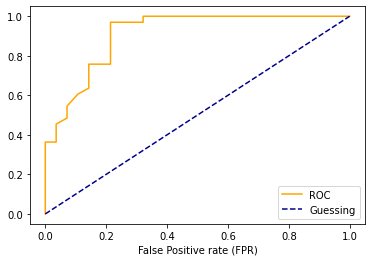

In [70]:
roc_curve_plot(fpr,tpr)

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
roc_auc_score(y_test,y_preds_positive)

0.9090909090909092

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
heart_shuff = heart.sample(frac =1)

In [75]:
#train = 70 % , validation = 15% , test =15%

In [76]:
heart_train = len(round(heart_shuff*0.7))

In [77]:
heart_train

303

In [78]:
heart_train = round(0.7*len(heart_shuff))

In [79]:
heart_train

212

In [80]:
heart_valid = round(heart_train + 0.15*len(heart_shuff))

In [81]:
heart_valid

257

In [82]:
x_train = x[:heart_train]
x_valid = x[heart_train:heart_valid]
x_test = x[heart_valid:]

In [84]:
len(x_test) , len(x_valid) , len(x_train)

(46, 45, 212)

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
grid = {"n_estimators" : [10,100,200,500,1000,1200],
       "max_depth":[None , 5,10,20,30],
       "max_features" : ["auto" , "sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]}

In [90]:
x = heart_shuff.drop("target" , axis = 1)
y = heart_shuff["target"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [91]:
model12 = RandomForestClassifier(n_jobs=1)

rm_model12 = RandomizedSearchCV(model12 , grid , n_iter=10 , cv = 5 , verbose=2 )

In [94]:
y_preds = rm_model12.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_l

[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.5s finished
